# Project: Explore Weather Trends

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#tools">Tools</a></li>
<li><a href="#approach">Approach</a></li>
<li><a href="#observations">Observations</a></li>
</ul>

<a id='intro'></a>
## Introduction

Within this project the provided average temperature data for the city **Munich** is compared to the average temperature data **worldwide**, which has been provided on the udacity homepage. 

<a id='tools'></a>
## Tools
The following tools have been used within this project:

- **SQL database:** A SQL databse has been accessed via the udacity page in order to receive the temperature data as csv files
- **Jupyter Notebooks:** Jupyter notebooks has been used as tool to clean, analyze data and visualize relevant findings

<a id='approach'></a>
## Approach

Following the general steps are described which have been performed within this project.

### I. Retrieving project data
The respective datasets have been downloaded as csv files from the udacity homepage by applying the queries to the given SQL datase:

1, weather_data_munich.csv: **Select * from city_data where city = 'Munich'**  
2, weather_data_global.csv: **Select * from global_data**

### II. Importing libraries and creating dataframe

In [42]:
# Before starting into the actual data analysis the necessary libraries and packages are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
# Loading csv files as data frame and inspecting first samples in dataset
df_local = pd.read_csv('weather_data_munich.csv')
df_global = pd.read_csv('weather_data_global.csv')

### III. Assessing data
In order to sufficiently understand the project data, the shape, rows and columens as well as the datatypes and mean values are examined.

In [44]:
# df_local: Examining shape
df_local.shape

(271, 4)

In [45]:
# df_local: Examining general characteristics
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   city      271 non-null    object 
 2   country   271 non-null    object 
 3   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


In [46]:
# df_local: Checking types of data type 'object'
obj_labels = ['city','country']
for c in obj_labels:
   print(c, type(df_local[c][0]))

city <class 'str'>
country <class 'str'>


In [47]:
# df_global: Examining shape
df_global.shape

(266, 2)

In [48]:
# df_global: Examining general characteristics
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


### IV. Cleaning data
Due to comparability and accessability, the relevant data within the two dataframes **df_local** and **df_global** gets combined within one single dataframe **df**.

**a,** Preparing both dataframes in order to combine them in a new datarame.

In [49]:
# Current state: df_global covers timespan from 1750 to 2015 and df_local from 1743 to 2013
# -> Reducing df_local and df_global to mutual timespan (1750 to 2013)
df_global =  df_global.drop([264,265])
df_local = df_local.drop([0,1,2,3,4,5,6])

**b,** Making sure that the number of samples are equal and both dataframes cover the same timespan.

In [50]:
# Reseting indices for both dataframes as rows from the dataframes have been deleted
df_global = df_global.reset_index(drop=True)
df_local = df_local.reset_index(drop=True)

In [51]:
# Do the two dataframes really have the same number of rows? Otherwise they can't be combined later.
if len(df_global.year) == len(df_local.year):
    print(True)

True


In [52]:
# Do the two dataframes really have in every sample the same value for 'year'?
cross_check = []
for c in range(len(df_global.year)):
    cross_check.append(df_global.year[c] == df_local.year[c])

cross_check = np.array(cross_check)

if cross_check.sum() == len(cross_check):
    print(True)

True


**c,** Creating the new dataframe df and combining the relevant data.

In [53]:
# Creating the new dataframe df in order to combine the relevant data from df_local and df_global
df = df_global.copy()

In [54]:
# Renaming column label in order to differentiate between global and local
df.rename(columns={'avg_temp':'avg_temp_global'}, inplace=True)

In [55]:
# Adding temperature data from df_local to new dataframe df with adapted label name
df['avg_temp_local'] = df_local['avg_temp'].copy()

**d,** Quick check if the data has been combined correctly within the new dataframe.

In [56]:
df.head(3)

,year,avg_temp_global,avg_temp_local
0,1750,8.72,5.40
1,1751,7.98,5.54
2,1752,5.78,0.53


### V. Analyzing data
Within this step necessary calculations within the project are performed and relevant relationships within the data are visualized

**a,** Creating two new columns in df and calculating **Moving Average over 10 years** for local and global temperature data.

In [57]:
# Creating two new columns with values for moving averages over 10 years for local an global data
df['mov_avg_global'] = df['avg_temp_global'].rolling(window=10).mean()
df['mov_avg_local'] = df['avg_temp_local'].rolling(window=10).mean()

In [58]:
## Checking, if new columns have been created and if calcuations were successfull
df.head(12)

,year,avg_temp_global,avg_temp_local,mov_avg_global,mov_avg_local
0,1750,8.72,5.40,NaN,NaN
1,1751,7.98,5.54,NaN,NaN
2,1752,5.78,0.53,NaN,NaN
3,1753,8.39,4.61,NaN,NaN
4,1754,8.47,4.33,NaN,NaN
5,1755,8.36,4.05,NaN,NaN
6,1756,8.85,4.64,NaN,NaN
7,1757,9.02,4.30,NaN,NaN
8,1758,6.74,3.83,NaN,NaN
9,1759,7.99,4.89,8.030,4.212


**b,** Plotting **line graph** in order to compare the **moving average** for local and global temperature data.

In [59]:
# Creating new dataframe to be able to work with subplots within the visualization
df_graph = df.copy()

In [60]:
# Setting column 'year' as index -> x-axis within line chart
df_graph = df_graph.set_index('year')

In [61]:
# Getting rid of the columns 'avg_temp_global' and 'avg_temp_local' as they are not needed within the line chart
df_graph.drop(['avg_temp_local', 'avg_temp_global'], axis=1, inplace=True)

In [62]:
## Checking, if the previous steps were successfull
df_graph.head(12)

,mov_avg_global,mov_avg_local
year,,
1750,NaN,NaN
1751,NaN,NaN
1752,NaN,NaN
1753,NaN,NaN
1754,NaN,NaN
1755,NaN,NaN
1756,NaN,NaN
1757,NaN,NaN
1758,NaN,NaN


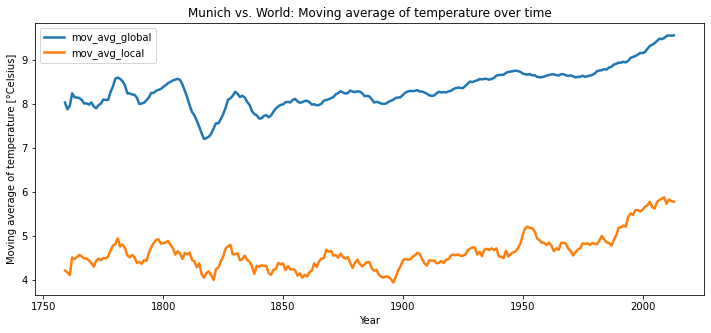

In [63]:
# Plotting the combined line chart for Munich and the worldwide temperature data
df_graph.plot.line(figsize=(12,5), linewidth=2.5);
plt.title('Munich vs. World: Moving average of temperature over time')
plt.xlabel('Year')
plt.ylabel('Moving average of temperature [°Celsius]');

**c,** Checking via calculation if the **mean temperature** in Munich and for the world **is increasing or decreasing**.

In [64]:
# Munich: Comparing first datapoint for moving average of temperature ('year' = 1759) with last datapoint ('year' = 2013)
temp_local_dp1 = df.query('year == 1759').mov_avg_local.sum()
temp_local_dp2 = df.query('year == 2013').mov_avg_local.sum()
diff_local = temp_local_dp2 - temp_local_dp1
diff_local

1.565999999999998

In [65]:
# Munich: Checking if temperature has been rising:
if diff_local > 0:
    print(True)

True


In [66]:
# World: Comparing first datapoint for moving average of temperature ('year' = 1759) with last datapoint ('year' = 2013)
temp_global_dp1 = df.query('year == 1759').mov_avg_global.sum()
temp_global_dp2 = df.query('year == 2013').mov_avg_global.sum()
diff_global = temp_global_dp2 - temp_global_dp1
diff_global

1.5260000000000087

In [67]:
# World: Checking if temperature has been rising:
if diff_global > 0:
    print(True)

True


**d,** Comparing **mean temperature changes** over time. To make the results more significant, the **mean values** for **two test periods** (period1: 1750 to 1800, period 2: 1950 to 2000) are calculated for Munich and the worldwide temperature.

In [68]:
# Munich: Calculating mean temperature difference for the two test intervals
temp_local_p1 = df.query('year <1800').avg_temp_local.mean()
temp_local_p2 = df.query('year >=1950 and year <2000').avg_temp_local.mean()
diff_local = temp_local_p2 - temp_local_p1
diff_local

0.4631999999999996

In [69]:
# World: Calculating mean temperature difference for the two test intervals
temp_global_p1 = df.query('year <1800').avg_temp_global.mean()
temp_global_p2 = df.query('year >=1950 and year <2000').avg_temp_global.mean()
diff_global = temp_global_p2 - temp_global_p1
diff_global

0.6188000000000002

In [70]:
# Checking if the temperature mean temperature changes have been larger for Munich than for the world
if diff_local > diff_global:
    print(True)

**d,** Checking if the **velocity** with which the average global temperature **is rising increased** during the last 100 years.

In [71]:
# Dividing the timespan from 1915 to 2015 into 4 intervals and calculating the mean global temperature for each interval
mean_interv_1 = df.query('year >= 1915 and year <1940').avg_temp_global.mean()
mean_interv_2 = df.query('year >= 1940 and year <1965').avg_temp_global.mean()
mean_interv_3 = df.query('year >= 1965 and year <1990').avg_temp_global.mean()
mean_interv_4 = df.query('year >= 1990 and year <2015').avg_temp_global.mean()
print(mean_interv1, mean_interv2, mean_interv3, mean_interv4)

8.5076 8.6752 8.745599999999998 9.367916666666666


In [72]:
# Calculating the difference between each intervals for the mean temperature values
diff_1 = mean_interv_1 - mean_interv_2
diff_2 = mean_interv_3 - mean_interv_2
diff_3 = mean_interv_4 - mean_interv_3
print(diff_1, diff_2, diff_3)

-0.1676000000000002 0.07039999999999758 0.6223166666666682


In [73]:
# Quick check, if calculated values support theory of increasing velocity
if diff_3 > diff_2 and diff_2 > diff_1:
    print(True)

True


<a id='observations'></a>
## Observations

**1. Observation:** The average temperature in Munich **has consistently been lower** than for the whole world during the regarded timespan (1750 - 2013).

> The fact that the line for the moving average temperature in Munich (organe) stays beneath the average temperature worldwide (blue) for the whole period under review (1750 to 2013) in the line chart supports this statement

**2. Observation:** The mean temperatures **are rising** in Munich **as well as** as well as worldwide over the observation timespan (1750 - 2013).

> This development can easily be observed by regarding the line graph. Additionally the general temperature rise from 1758 to 2013 (moving average over 10 years) has been calculated. For Munich the increase in temperature was about 1.566 °C and for the world a rise of 1.526 °C.

**3. Observation:** The **mean temperature changes** in Munich **were larger** than worldwide.
> *Justification*: In Munich the temperature increase from period 1 (1750 to 1800) to period 2 (1950 to 2000) was about 0.641 °C, while the the temperature increase for the world was about 0.619°C.

**4. Observation:** The **velocity** with which the average global temperature **is rising increased** during the last 100 years (1915 to 2015).
> An increase in velocity of global warming within the last 100 years seems apparent from the plotted line graph. Also the differences in mean global temperature which have been calculated additionally support this observation (difference I2 to I1: -0.1676, difference I3 to I2: 0.0704, difference I4 to I3: 0.6223)